In [76]:
%pylab inline
import os
import seaborn as sns
import pickle as pkl
pal = sns.color_palette('Blues')
sns.set_context("paper", font_scale=1.5)
sns.set_style("ticks")
#sns.set(color_codes=True)
from scipy.stats import gaussian_kde
import pandas as pd
from eod import stations_cc

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [77]:
dic = pkl.load(open('/users/global/cornkle/C_paper/chris2016/chris_mcs_-40_gt1000.p', 'rb'))
#chris_mcs_-10_gt1000

In [78]:
dic.keys()

dict_keys(['sum', 'clon', 'cent', 'year', 'precip', 'nz', 'clat', 'valid', 'sum20', 'month', 'sum30', 'hour'])

In [79]:
precip = np.array(dic['precip'])
year = np.array(dic['year'])
clat = np.array(dic['clat'])
clon = np.array(dic['clon'])
hour = np.array(dic['hour'])
month = np.array(dic['month'])
sum20 = np.array(dic['sum20'])
sum30 = np.array(dic['sum30'])
valid = np.array(dic['valid'])
tsum = np.array(dic['sum'])
cent = np.array(dic['cent'])
nz = np.array(dic['nz'])

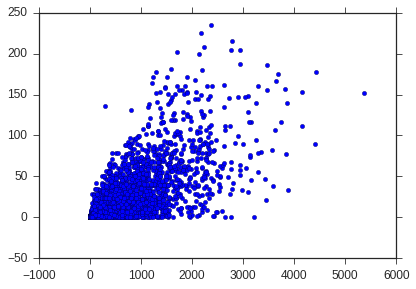

In [80]:
f=plt.figure()

plt.scatter(nz, sum20)

[ 0  6 12 18 24]
1
2
3
4


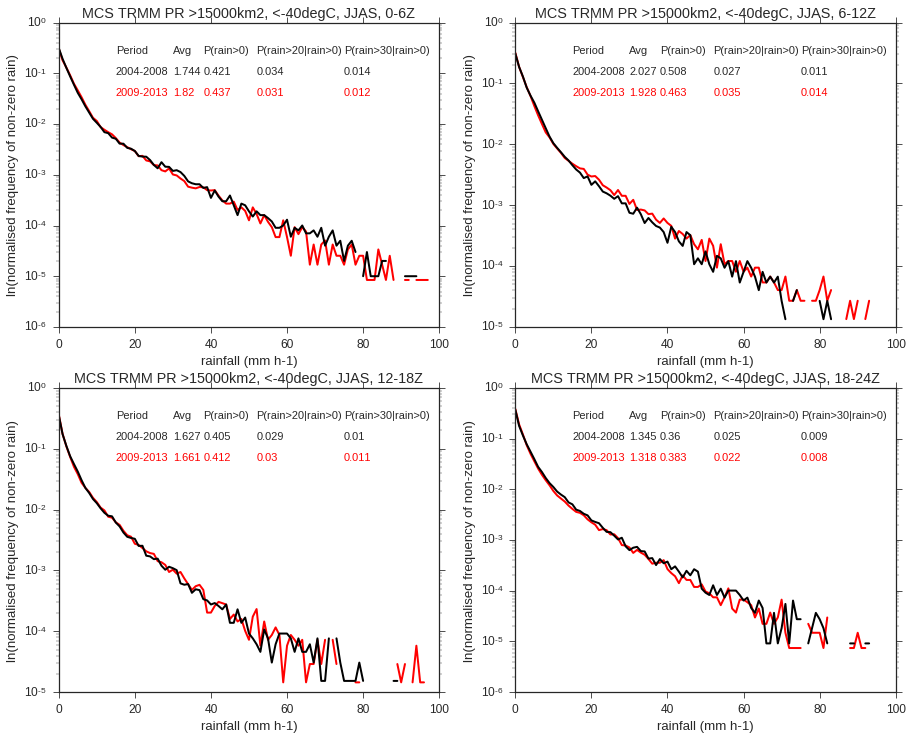

In [81]:
hours = np.arange(0,25,6)
print(hours)
f = plt.figure(figsize=(15, 12), dpi=400)
for ind, h in enumerate(hours):
    if ind == 0:
        continue    
    boole1=[(year>2008) & (clat>12) & (clon<11) & (hour<h) & (hour>=hours[ind-1]) & (month>=6) & (month<=9)]  
    boole2=[(year<=2008) & (clat>12) & (clon<11) & (hour<h) & (hour>=hours[ind-1]) & (month>=6) & (month<=9)] 
    precip1=precip[boole1]
    precip2=precip[boole2]
    
    avg1 = np.round(np.sum(tsum[boole1])/np.sum(valid[boole1]), decimals=3 )
    avg2 = np.round(np.sum(tsum[boole2])/np.sum(valid[boole2]), decimals=3 )
    p201 = np.round(np.sum(sum20[boole1])/np.sum(nz[boole1]), decimals=3 )
    p202 = np.round(np.sum(sum20[boole2])/np.sum(nz[boole2]), decimals=3 )
    p301 = np.round(np.sum(sum30[boole1])/np.sum(nz[boole1]), decimals=3 )
    p302 = np.round(np.sum(sum30[boole2])/np.sum(nz[boole2]), decimals=3 )
    pnz1 = np.round(np.sum(nz[boole1])/np.sum(valid[boole1]), decimals=3 )
    pnz2 = np.round(np.sum(nz[boole2])/np.sum(valid[boole2]), decimals=3 )
    
    precip1=[item for sublist in precip1 for item in sublist]
    precip2=[item for sublist in precip2 for item in sublist]
    weights1 = np.ones_like(precip1) / float(len(precip1))
    weights2 = np.ones_like(precip2) / float(len(precip2))
    hist1, h1 = np.histogram(precip1, bins=np.arange(0.1,100+1,1), weights=weights1, range=(0.1,100))
    hist2, h2 = np.histogram(precip2, bins=np.arange(0.1,100+1,1), weights=weights2, range=(0.1,100))
    print(ind)
    ax = f.add_subplot(2,2,ind)
    line, = ax.semilogy(hist1, color='r', lw=2, label='2009-2013')
    line, = ax.semilogy(hist2, color='black', lw=2, label='2004-2008')
    plt.ylabel('ln(normalised frequency of non-zero rain)')
    plt.xlabel('rainfall (mm h-1)')
    plt.title('MCS TRMM PR >15000km2, <-40degC, JJAS, '+str(hours[ind-1])+'-'+str(h)+'Z')
    x=0.15
    y=0.9
    plt.text(x,y,'Period', transform=ax.transAxes, fontsize=11)
    plt.text(x+0.15,y,'Avg', transform=ax.transAxes, fontsize=11)
    plt.text(x+0.23,y,'P(rain>0)', transform=ax.transAxes, fontsize=11)
    plt.text(x+0.37,y,'P(rain>20|rain>0)', transform=ax.transAxes, fontsize=11)
    plt.text(x+0.6,y,'P(rain>30|rain>0)', transform=ax.transAxes, fontsize=11)
    
    y=0.83
    plt.text(x,y,'2004-2008', transform=ax.transAxes, fontsize=11)
    plt.text(x+0.15,y,str(avg2), transform=ax.transAxes, fontsize=11)
    plt.text(x+0.23,y,str(pnz2), transform=ax.transAxes, fontsize=11)
    plt.text(x+0.37,y,str(p202), transform=ax.transAxes, fontsize=11)
    plt.text(x+0.6,y,str(p302), transform=ax.transAxes, fontsize=11)
    
    y=0.76
    plt.text(x,y,'2009-2013', transform=ax.transAxes, fontsize=11, color='r')
    plt.text(x+0.15,y,str(avg1), transform=ax.transAxes, fontsize=11, color='r')
    plt.text(x+0.23,y,str(pnz1), transform=ax.transAxes, fontsize=11, color='r')
    plt.text(x+0.37,y,str(p201), transform=ax.transAxes, fontsize=11, color='r')
    plt.text(x+0.6,y,str(p301), transform=ax.transAxes, fontsize=11, color='r')
  
    plt.tight_layout
    #plt.savefig('/users/global/cornkle/C_paper/chris2016/test.png')
   

In [82]:
boole1=[(year>2008) & (clat>12) & (clon<11) & (hour<18) & (hour>=12) & (month>=6) & (month<=9)]  
boole2=[(year<=2008) & (clat>12) & (clon<11) & (hour<18) & (hour>=12) & (month>=6) & (month<=9)] 
precip1=cent[boole1]
precip2=cent[boole2]
precip2.shape

(262,)

[ 0  6 12 18 24]
1
2
3
4


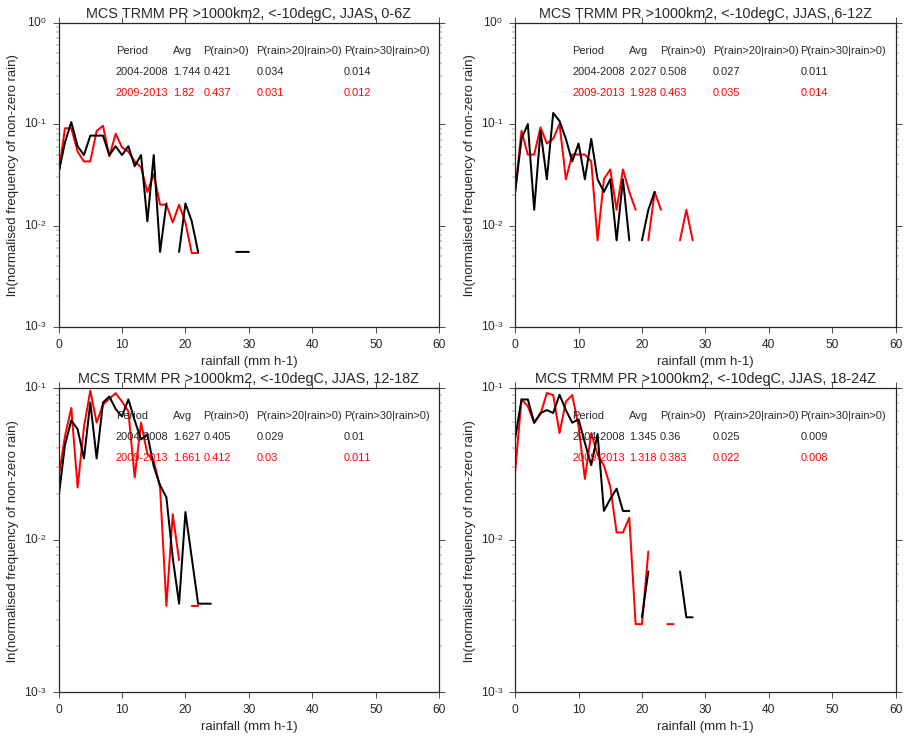

In [83]:
hours = np.arange(0,25,6)
print(hours)
f = plt.figure(figsize=(15, 12), dpi=400)
for ind, h in enumerate(hours):
    if ind == 0:
        continue    
    boole1=[(year>2008) & (clat>12) & (clon<11) & (hour<h) & (hour>=hours[ind-1]) & (month>=6) & (month<=9)]  
    boole2=[(year<=2008) & (clat>12) & (clon<11) & (hour<h) & (hour>=hours[ind-1]) & (month>=6) & (month<=9)] 
    precip1=cent[boole1]
    precip2=cent[boole2]
    
    avg1 = np.round(np.sum(tsum[boole1])/np.sum(valid[boole1]), decimals=3 )
    avg2 = np.round(np.sum(tsum[boole2])/np.sum(valid[boole2]), decimals=3 )
    p201 = np.round(np.sum(sum20[boole1])/np.sum(nz[boole1]), decimals=3 )
    p202 = np.round(np.sum(sum20[boole2])/np.sum(nz[boole2]), decimals=3 )
    p301 = np.round(np.sum(sum30[boole1])/np.sum(nz[boole1]), decimals=3 )
    p302 = np.round(np.sum(sum30[boole2])/np.sum(nz[boole2]), decimals=3 )
    pnz1 = np.round(np.sum(nz[boole1])/np.sum(valid[boole1]), decimals=3 )
    pnz2 = np.round(np.sum(nz[boole2])/np.sum(valid[boole2]), decimals=3 )
    
    #precip1=[item for sublist in precip1 for item in sublist]
    #precip2=[item for sublist in precip2 for item in sublist]
    weights1 = np.ones_like(precip1) / float(len(precip1))
    weights2 = np.ones_like(precip2) / float(len(precip2))
    hist1, h1 = np.histogram(precip1, bins=np.arange(0.1,60+1,1), weights=weights1, range=(0.1,60))
    hist2, h2 = np.histogram(precip2, bins=np.arange(0.1,60+1,1), weights=weights2, range=(0.1,60))
    print(ind)
    ax = f.add_subplot(2,2,ind)
    line, = ax.semilogy(hist1, color='r', lw=2, label='2009-2013')
    line, = ax.semilogy(hist2, color='black', lw=2, label='2004-2008')
    plt.ylabel('ln(normalised frequency of non-zero rain)')
    plt.xlabel('rainfall (mm h-1)')
    plt.title('MCS TRMM PR >1000km2, <-10degC, JJAS, '+str(hours[ind-1])+'-'+str(h)+'Z')
    x=0.15
    y=0.9
    plt.text(x,y,'Period', transform=ax.transAxes, fontsize=11)
    plt.text(x+0.15,y,'Avg', transform=ax.transAxes, fontsize=11)
    plt.text(x+0.23,y,'P(rain>0)', transform=ax.transAxes, fontsize=11)
    plt.text(x+0.37,y,'P(rain>20|rain>0)', transform=ax.transAxes, fontsize=11)
    plt.text(x+0.6,y,'P(rain>30|rain>0)', transform=ax.transAxes, fontsize=11)
    
    y=0.83
    plt.text(x,y,'2004-2008', transform=ax.transAxes, fontsize=11)
    plt.text(x+0.15,y,str(avg2), transform=ax.transAxes, fontsize=11)
    plt.text(x+0.23,y,str(pnz2), transform=ax.transAxes, fontsize=11)
    plt.text(x+0.37,y,str(p202), transform=ax.transAxes, fontsize=11)
    plt.text(x+0.6,y,str(p302), transform=ax.transAxes, fontsize=11)
    
    y=0.76
    plt.text(x,y,'2009-2013', transform=ax.transAxes, fontsize=11, color='r')
    plt.text(x+0.15,y,str(avg1), transform=ax.transAxes, fontsize=11, color='r')
    plt.text(x+0.23,y,str(pnz1), transform=ax.transAxes, fontsize=11, color='r')
    plt.text(x+0.37,y,str(p201), transform=ax.transAxes, fontsize=11, color='r')
    plt.text(x+0.6,y,str(p301), transform=ax.transAxes, fontsize=11, color='r')
  
    plt.tight_layout
    #plt.savefig('/users/global/cornkle/C_paper/chris2016/pdist_95thcent_gt1000_-10.png')
    